In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import binom
from scipy.optimize import curve_fit

0.19211796398213088 0.07904083782294025


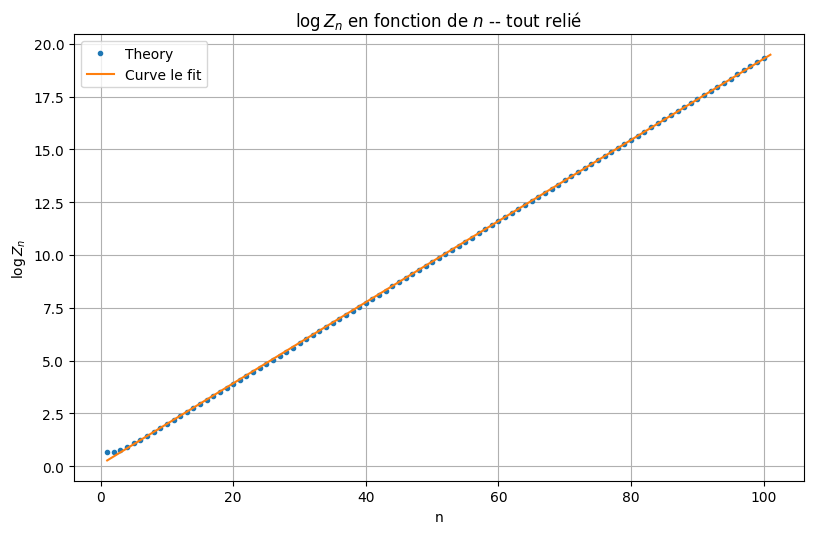

In [16]:
N = 100
T = 1
J_0 = 1
B_0 = 0

n_range = np.arange(1, N + 1)
log_Z = []

for n in n_range:
  J = J_0 / n**2
  B = B_0 / n
  n_plus = np.arange(0, n + 1)
  log_Z.append(np.log(np.exp(-n / 2 / T)  * np.sum(binom(n, n_plus) * np.exp(( J * (2 * n_plus - n)**2 + B * (2 * n_plus / n - 1) ) / 2 / T))))

# Curve le fit
def f(x, a, b):
  return a * x + b

popt, _ = curve_fit(f, n_range, log_Z)
print(*popt)
a,b= popt
x = np.linspace(1, N + 1, 100)

#plot plot
fig = plt.figure(figsize=(8,5))

# Plot the theoritical data
plt.plot(n_range, log_Z, '.', label='Theory')
# Plot the fit
plt.plot(x, f(x, a,b), label='Curve le fit')

plt.grid()
plt.tight_layout()
plt.xlabel('n')
plt.ylabel(r'$\log{Z_n}$')
plt.title(r'$\log{Z_n}$ en fonction de $n$ -- tout relié')
plt.legend()
plt.show()